# Derive empirically the MW-bar pattern speed and inclination angle

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from astropy.io import fits
import tqdm
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
import nmmn.plots
import vorbin
wolfram=nmmn.plots.wolframcmap() # for Mathematica's cmap
parula=nmmn.plots.parulacmap() # for MATLAB's cmap
turbo=nmmn.plots.turbocmap() # Turbo
import warnings
warnings.filterwarnings('ignore')

In [4]:
# LOAD THE DATA
# this is the latest APOGEE catalogue that APW sent me with orbital properties determined using StarHorse distances
path = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/bar-prob_starhorse.fits'
tb = fits.open(path)
data = tb[1].data 

In [5]:
mask_knot = data['Knot Probability']>0.8
mask_bar = data['Bar Probability']>0.8
mask_disc = data['Disc Probability']>0.8

In [11]:
lz = data['L'][:,2]
Rgal = np.sqrt(data['xyz'][:,0]**2+data['xyz'][:,1]**2)

In [14]:
# Eilers rotation curve
vcirc = 229.-1.7*(Rgal-8.275)
Rg = (-lz/vcirc)

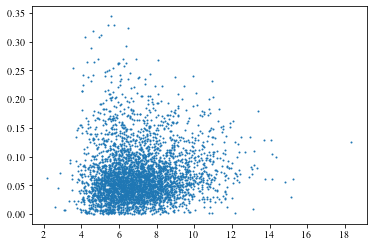

In [50]:
# good_idx = ((np.abs(astronn_VAC_f['dist_model_error']/astronn_VAC_f['dist'])<0.5) & (astronn_VAC_f['dist']<2e10) & (astronn_VAC_f['fakemag']<500) & (astronn_VAC_f['LOGG_ERR']<0.2))
# plt.hist(data['fakemag'])
dist = data['dist50']
dist_e = (data['dist84']-data['dist16'])/2

plt.scatter(dist,dist_e/dist,s=1)


# Estimate the pattern speed of the bar

In [62]:
mask_dist = dist_e/dist<0.1

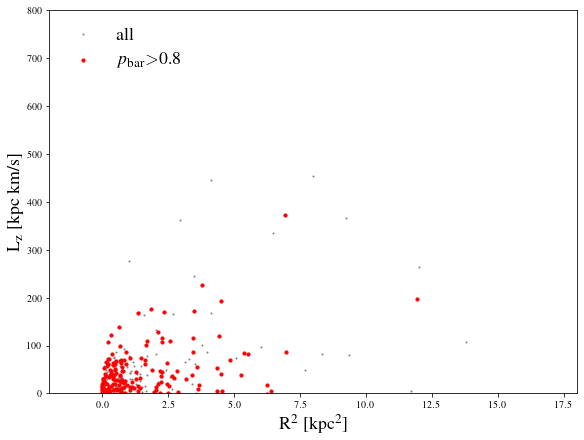

In [63]:
plt.figure(figsize=(8,6),constrained_layout=True,facecolor='white')

plt.scatter(Rgal[mask_dist]**2,-lz[mask_dist],s=1,c='gray',label='all')
# plt.scatter(Rgal[mask_disc],lz[mask_disc],s=10,c='dodgerblue')
plt.scatter(Rgal[mask_bar&mask_dist]**2,-lz[mask_bar&mask_dist],s=10,c='r',label='$p_{\mathrm{bar}}$$>$0.8')
# plt.scatter(Rgal[mask_knot],lz[mask_knot],s=10,c='gold')
plt.xlabel('R$^{2}$ [kpc$^{2}$]',fontsize=18)
plt.ylabel('L$_{\mathrm{z}}$ [kpc km/s]',fontsize=18)
plt.ylim(0,800)
plt.xlim(-2,18)
plt.legend(loc='upper left',fontsize=18,frameon=False)

In [64]:
omega_p = lz[mask_bar&mask_dist]/Rgal[mask_bar&mask_dist]**2

print(np.nanmean(omega_p))
print(np.nanmedian(omega_p))

30.698242937946503
32.53579221251707


# Plot the bar angle

In [65]:
# x = (data['X']*-8.178)+8.178
# y = data['Y']*8.178
# z = data['Z']*8.178

# vR = data['vR']*220.
# vphi = data['vT']*220.
# vz = data['vZ']*220.

In [66]:
# phi = data['phi']

In [67]:
# import math
# vx = vR*np.cos(phi) - Rgal*np.sin(phi)
# vy = vR*np.sin(phi) + Rgal*np.cos(phi)

In [68]:
lx = data['vxyz'][:,1]*data['xyz'][:,2] - data['vxyz'][:,2]*data['xyz'][:,1]
ly = data['vxyz'][:,2]*data['xyz'][:,0] - data['vxyz'][:,0]*data['xyz'][:,2]
lz = data['vxyz'][:,0]*data['xyz'][:,1] - data['vxyz'][:,1]*data['xyz'][:,0]

(array([1.560e+02, 1.682e+03, 1.109e+03, 1.920e+02, 1.400e+01, 8.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-453.79933849,  -26.26680058,  401.26573732,  828.79827523,
        1256.33081314, 1683.86335104, 2111.39588895, 2538.92842686,
        2966.46096476, 3393.99350267, 3821.52604057]),
 <BarContainer object of 10 artists>)

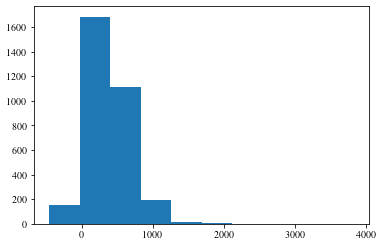

In [70]:
plt.hist(lz[mask_dist])

In [71]:
lx_all = lx[~np.isnan(lx)&mask_dist]
ly_all = ly[~np.isnan(lx)&mask_dist]
data_all = np.array([lx_all,ly_all])

lx_knot = lx[mask_knot&(~np.isnan(lx))&mask_dist]
ly_knot = ly[mask_knot&(~np.isnan(lx))&mask_dist]
data_knot = np.array([lx_knot,ly_knot])

lx_bar = lx[mask_bar&(~np.isnan(lx))&mask_dist]
ly_bar = ly[mask_bar&(~np.isnan(lx))&mask_dist]
data_bar = np.array([lx_bar,ly_bar])

lx_disc = lx[mask_disc&(~np.isnan(lx))&mask_dist]
ly_disc = ly[mask_disc&(~np.isnan(lx))&mask_dist]
data_disc = np.array([lx_disc,ly_disc])


In [72]:
from scipy.stats import kde
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k_all = kde.gaussian_kde(data_all)
nbins=20
xi_all, yi_all = np.mgrid[-200:200:nbins*1j, -200:200:nbins*1j]
zi_all = k_all(np.vstack([xi_all.flatten(), yi_all.flatten()]))

k_knot = kde.gaussian_kde(data_knot)
nbins=20
xi_knot, yi_knot = np.mgrid[-200:200:nbins*1j, -200:200:nbins*1j]
zi_knot = k_knot(np.vstack([xi_knot.flatten(), yi_knot.flatten()]))

k_bar = kde.gaussian_kde(data_bar)
nbins=20
xi_bar, yi_bar = np.mgrid[-200:200:nbins*1j, -200:200:nbins*1j]
zi_bar = k_bar(np.vstack([xi_bar.flatten(), yi_bar.flatten()]))

k_disc = kde.gaussian_kde(data_disc)
nbins=20
xi_disc, yi_disc = np.mgrid[-200:200:nbins*1j, -200:200:nbins*1j]
zi_disc = k_disc(np.vstack([xi_disc.flatten(), yi_disc.flatten()]))


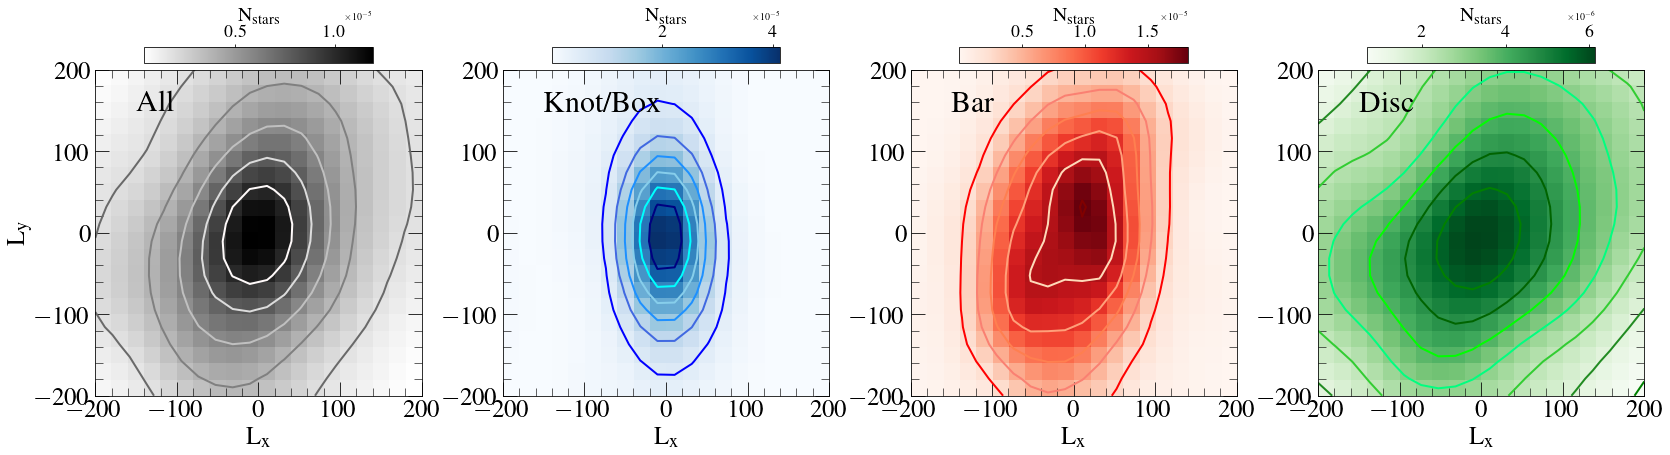

In [73]:
from matplotlib.colors import LogNorm
colores1 = ['k','dimgray','gray','silver','gainsboro','snow']
colores = ['navy','b','royalblue','dodgerblue','skyblue','cyan']
colores2 = ['maroon','r','salmon','coral','lightsalmon','peachpuff']
colores3 = ['darkgreen','g','forestgreen','limegreen','springgreen','lime']

fig, axes = plt.subplots(1, 4,figsize=(28,6),facecolor='white')


axes[0].text(-150,150,'All',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[0].imshow(np.rot90(zi_all.reshape(xi_all.shape)),cmap='binary',extent=[-200,200,-200,200])
axes[0].contour(xi_all, yi_all, zi_all.reshape(xi_all.shape),levels=6,colors=colores1,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0].set_xlabel('L$_{\mathrm{x}}$',fontsize=25)
axes[0].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[0].inset_axes([0.15, 1.02, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
cbar.ax.tick_params(labelsize=18)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[0].subplot(1,3,1)
# axes[0].title('Knot',fontsize=20)
axes[1].text(-150,150,'Knot/Box',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[1].imshow(np.rot90(zi_knot.reshape(xi_knot.shape)),cmap='Blues',extent=[-200,200,-200,200])
axes[1].contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1].set_xlabel('L$_{\mathrm{x}}$',fontsize=25)
# axes[1].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[1].inset_axes([0.15, 1.02, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
cbar.ax.tick_params(labelsize=18)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[1].subplot(1,3,2)
# axes[1].set_title('Bar',fontsize=20)
axes[2].text(-150,150,'Bar',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
color2 = axes[2].imshow(np.rot90(zi_bar.reshape(xi_bar.shape)),cmap='Reds',extent=[-200,200,-200,200])
axes[2].contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[2].set_xlabel('L$_{\mathrm{x}}$',fontsize=25)
# axes[2].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[2].minorticks_on()

# axes[1].colorbar(color2, aspect=40)
cax = axes[2].inset_axes([0.15, 1.02, 0.7, 0.05])
cbar = fig.colorbar(color2,ax=axes[2],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
cbar.ax.tick_params(labelsize=18)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[2].subplot(1,3,3)
# axes[2].set_title('Disc',fontsize=25)
axes[3].text(-150,150,'Disc',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
color3 = axes[3].imshow(np.rot90(zi_disc.reshape(xi_disc.shape)),cmap='Greens',extent=[-200,200,-200,200])
axes[3].contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
# plt.xlim(-0.6,0.6)
# plt.ylim(-0.25,0.5)
axes[3].set_xlabel('L$_{\mathrm{x}}$',fontsize=25)
# axes[3].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[3].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[3].minorticks_on()

cax = axes[3].inset_axes([0.15, 1.02, 0.7, 0.05])
cbar = fig.colorbar(color3,ax=axes[3],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
cbar.ax.tick_params(labelsize=18)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')


# Repeat the plot above for stars within 300pc of the disc

In [46]:
z = data['xyz'][:,2]

In [47]:
lx_all = lx[(np.abs(z)<0.3)&(~np.isnan(lx))]
ly_all = ly[(np.abs(z)<0.3)&(~np.isnan(lx))]
data_all = np.array([lx_all,ly_all])

lx_knot = lx[mask_knot&(np.abs(z)<0.3)&(~np.isnan(lx))]
ly_knot = ly[mask_knot&(np.abs(z)<0.3)&(~np.isnan(lx))]
data_knot = np.array([lx_knot,ly_knot])

lx_bar = lx[mask_bar&(np.abs(z)<0.3)&(~np.isnan(lx))]
ly_bar = ly[mask_bar&(np.abs(z)<0.3)&(~np.isnan(lx))]
data_bar = np.array([lx_bar,ly_bar])

lx_disc = lx[mask_disc&(np.abs(z)<0.3)&(~np.isnan(lx))]
ly_disc = ly[mask_disc&(np.abs(z)<0.3)&(~np.isnan(lx))]
data_disc = np.array([lx_disc,ly_disc])


In [48]:
from scipy.stats import kde
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k_all = kde.gaussian_kde(data_all)
nbins=20
xi_all, yi_all = np.mgrid[-200:200:nbins*1j, -200:200:nbins*1j]
zi_all = k_all(np.vstack([xi_all.flatten(), yi_all.flatten()]))

k_knot = kde.gaussian_kde(data_knot)
nbins=20
xi_knot, yi_knot = np.mgrid[-200:200:nbins*1j, -200:200:nbins*1j]
zi_knot = k_knot(np.vstack([xi_knot.flatten(), yi_knot.flatten()]))

k_bar = kde.gaussian_kde(data_bar)
nbins=20
xi_bar, yi_bar = np.mgrid[-200:200:nbins*1j, -200:200:nbins*1j]
zi_bar = k_bar(np.vstack([xi_bar.flatten(), yi_bar.flatten()]))

k_disc = kde.gaussian_kde(data_disc)
nbins=20
xi_disc, yi_disc = np.mgrid[-200:200:nbins*1j, -200:200:nbins*1j]
zi_disc = k_disc(np.vstack([xi_disc.flatten(), yi_disc.flatten()]))


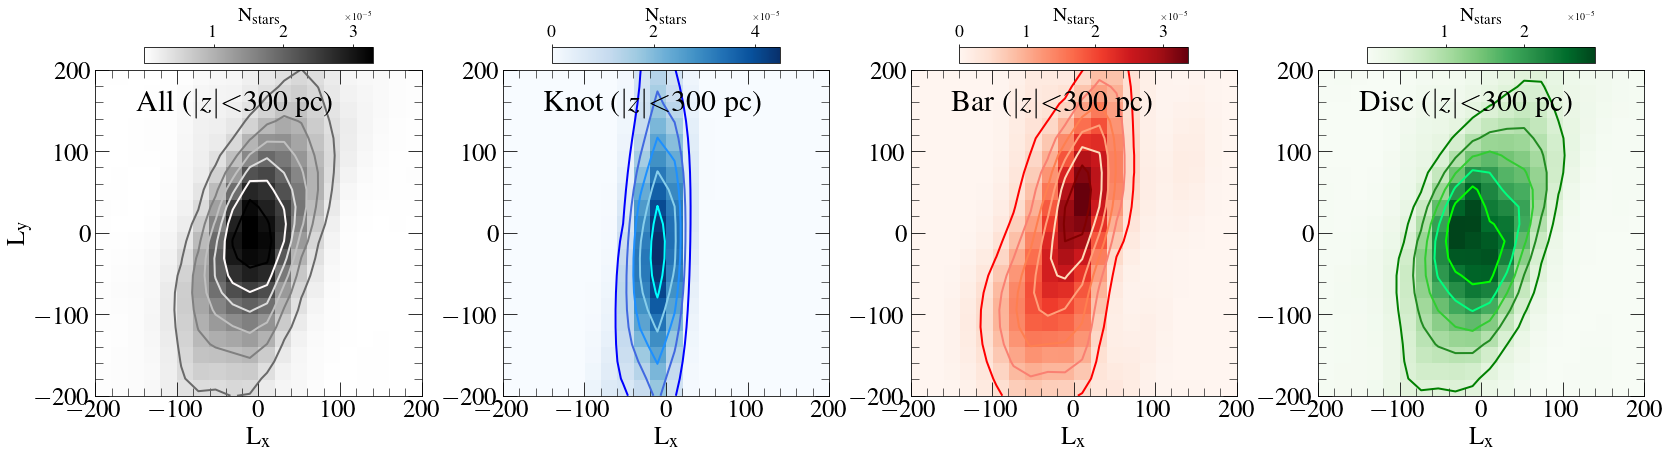

In [49]:
from matplotlib.colors import LogNorm
colores1 = ['k','dimgray','gray','silver','gainsboro','snow']
colores = ['navy','b','royalblue','dodgerblue','skyblue','cyan']
colores2 = ['maroon','r','salmon','coral','lightsalmon','peachpuff']
colores3 = ['darkgreen','g','forestgreen','limegreen','springgreen','lime']

fig, axes = plt.subplots(1, 4,figsize=(28,6),facecolor='white')


axes[0].text(-150,150,'All ($|z|$$<$300 pc)',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[0].imshow(np.rot90(zi_all.reshape(xi_all.shape)),cmap='binary',extent=[-200,200,-200,200])
axes[0].contour(xi_all, yi_all, zi_all.reshape(xi_all.shape),levels=6,colors=colores1,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0].set_xlabel('L$_{\mathrm{x}}$',fontsize=25)
axes[0].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[0].inset_axes([0.15, 1.02, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
cbar.ax.tick_params(labelsize=18)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[0].subplot(1,3,1)
# axes[0].title('Knot',fontsize=20)
axes[1].text(-150,150,'Knot ($|z|$$<$300 pc)',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[1].imshow(np.rot90(zi_knot.reshape(xi_knot.shape)),cmap='Blues',extent=[-200,200,-200,200])
axes[1].contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1].set_xlabel('L$_{\mathrm{x}}$',fontsize=25)
# axes[1].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[1].inset_axes([0.15, 1.02, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
cbar.ax.tick_params(labelsize=18)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[1].subplot(1,3,2)
# axes[1].set_title('Bar',fontsize=20)
axes[2].text(-150,150,'Bar ($|z|$$<$300 pc)',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
color2 = axes[2].imshow(np.rot90(zi_bar.reshape(xi_bar.shape)),cmap='Reds',extent=[-200,200,-200,200])
axes[2].contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[2].set_xlabel('L$_{\mathrm{x}}$',fontsize=25)
# axes[2].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[2].minorticks_on()

# axes[1].colorbar(color2, aspect=40)
cax = axes[2].inset_axes([0.15, 1.02, 0.7, 0.05])
cbar = fig.colorbar(color2,ax=axes[2],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
cbar.ax.tick_params(labelsize=18)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[2].subplot(1,3,3)
# axes[2].set_title('Disc',fontsize=25)
axes[3].text(-150,150,'Disc ($|z|$$<$300 pc)',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
color3 = axes[3].imshow(np.rot90(zi_disc.reshape(xi_disc.shape)),cmap='Greens',extent=[-200,200,-200,200])
axes[3].contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
# plt.xlim(-0.6,0.6)
# plt.ylim(-0.25,0.5)
axes[3].set_xlabel('L$_{\mathrm{x}}$',fontsize=25)
# axes[3].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[3].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[3].minorticks_on()

cax = axes[3].inset_axes([0.15, 1.02, 0.7, 0.05])
cbar = fig.colorbar(color3,ax=axes[3],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
cbar.ax.tick_params(labelsize=18)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')


# And for just 1$<$log$g$$<$1.5 stars

In [283]:
lx_all = lx[data['LOGG']<1.5]
ly_all = ly[data['LOGG']<1.5]
data_all = np.array([lx_all,ly_all])

lx_knot = lx[mask_knot&(data['LOGG']<1.5)]
ly_knot = ly[mask_knot&(data['LOGG']<1.5)]
data_knot = np.array([lx_knot,ly_knot])

lx_bar = lx[mask_bar&(data['LOGG']<1.5)]
ly_bar = ly[mask_bar&(data['LOGG']<1.5)]
data_bar = np.array([lx_bar,ly_bar])

lx_disc = lx[mask_disc&(data['LOGG']<1.5)]
ly_disc = ly[mask_disc&(data['LOGG']<1.5)]
data_disc = np.array([lx_disc,ly_disc])


In [284]:
from scipy.stats import kde
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k_all = kde.gaussian_kde(data_all)
nbins=20
xi_all, yi_all = np.mgrid[-200:200:nbins*1j, -200:200:nbins*1j]
zi_all = k_all(np.vstack([xi_all.flatten(), yi_all.flatten()]))

k_knot = kde.gaussian_kde(data_knot)
nbins=20
xi_knot, yi_knot = np.mgrid[-200:200:nbins*1j, -200:200:nbins*1j]
zi_knot = k_knot(np.vstack([xi_knot.flatten(), yi_knot.flatten()]))

k_bar = kde.gaussian_kde(data_bar)
nbins=20
xi_bar, yi_bar = np.mgrid[-200:200:nbins*1j, -200:200:nbins*1j]
zi_bar = k_bar(np.vstack([xi_bar.flatten(), yi_bar.flatten()]))

k_disc = kde.gaussian_kde(data_disc)
nbins=20
xi_disc, yi_disc = np.mgrid[-200:200:nbins*1j, -200:200:nbins*1j]
zi_disc = k_disc(np.vstack([xi_disc.flatten(), yi_disc.flatten()]))


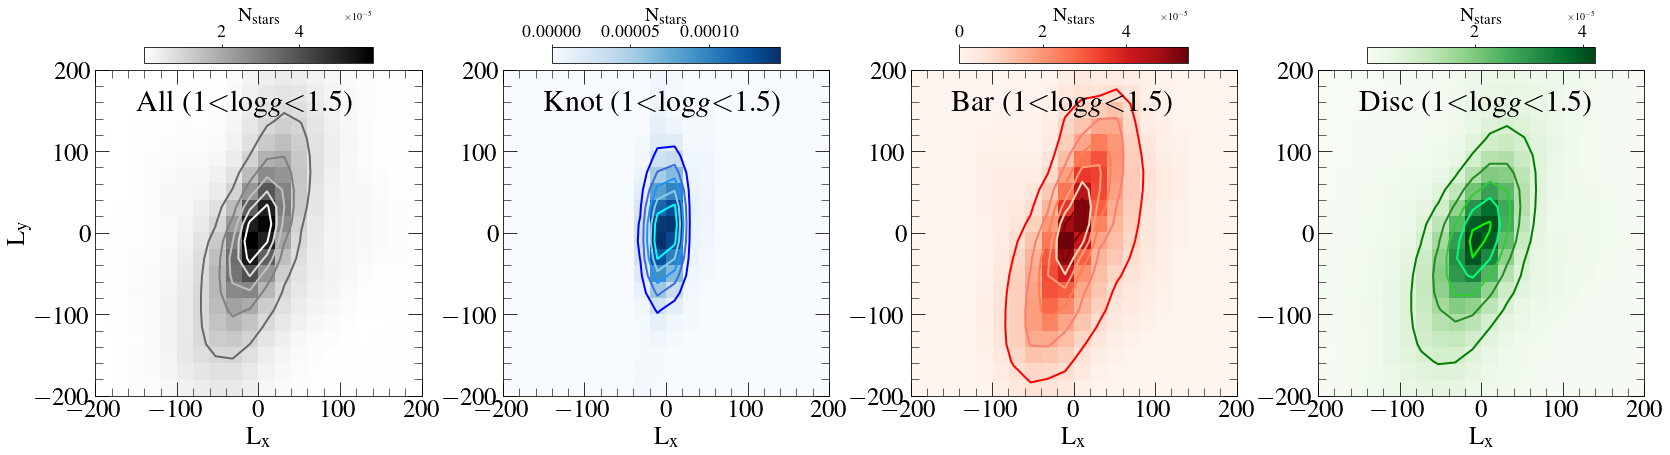

In [285]:
from matplotlib.colors import LogNorm
colores1 = ['k','dimgray','gray','silver','gainsboro','snow']
colores = ['navy','b','royalblue','dodgerblue','skyblue','cyan']
colores2 = ['maroon','r','salmon','coral','lightsalmon','peachpuff']
colores3 = ['darkgreen','g','forestgreen','limegreen','springgreen','lime']

fig, axes = plt.subplots(1, 4,figsize=(28,6),facecolor='white')


axes[0].text(-150,150,'All (1$<$log$g$$<$1.5)',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[0].imshow(np.rot90(zi_all.reshape(xi_all.shape)),cmap='binary',extent=[-200,200,-200,200])
axes[0].contour(xi_all, yi_all, zi_all.reshape(xi_all.shape),levels=6,colors=colores1,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0].set_xlabel('L$_{\mathrm{x}}$',fontsize=25)
axes[0].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[0].inset_axes([0.15, 1.02, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
cbar.ax.tick_params(labelsize=18)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[0].subplot(1,3,1)
# axes[0].title('Knot',fontsize=20)
axes[1].text(-150,150,'Knot (1$<$log$g$$<$1.5)',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[1].imshow(np.rot90(zi_knot.reshape(xi_knot.shape)),cmap='Blues',extent=[-200,200,-200,200])
axes[1].contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1].set_xlabel('L$_{\mathrm{x}}$',fontsize=25)
# axes[1].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[1].inset_axes([0.15, 1.02, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
cbar.ax.tick_params(labelsize=18)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[1].subplot(1,3,2)
# axes[1].set_title('Bar',fontsize=20)
axes[2].text(-150,150,'Bar (1$<$log$g$$<$1.5)',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
color2 = axes[2].imshow(np.rot90(zi_bar.reshape(xi_bar.shape)),cmap='Reds',extent=[-200,200,-200,200])
axes[2].contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[2].set_xlabel('L$_{\mathrm{x}}$',fontsize=25)
# axes[2].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[2].minorticks_on()

# axes[1].colorbar(color2, aspect=40)
cax = axes[2].inset_axes([0.15, 1.02, 0.7, 0.05])
cbar = fig.colorbar(color2,ax=axes[2],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
cbar.ax.tick_params(labelsize=18)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[2].subplot(1,3,3)
# axes[2].set_title('Disc',fontsize=25)
axes[3].text(-150,150,'Disc (1$<$log$g$$<$1.5)',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
color3 = axes[3].imshow(np.rot90(zi_disc.reshape(xi_disc.shape)),cmap='Greens',extent=[-200,200,-200,200])
axes[3].contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
# plt.xlim(-0.6,0.6)
# plt.ylim(-0.25,0.5)
axes[3].set_xlabel('L$_{\mathrm{x}}$',fontsize=25)
# axes[3].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[3].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[3].minorticks_on()

cax = axes[3].inset_axes([0.15, 1.02, 0.7, 0.05])
cbar = fig.colorbar(color3,ax=axes[3],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
cbar.ax.tick_params(labelsize=18)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')


In [259]:
lx_all = lx
lz_all = lz
data_all2 = np.array([lx_all,lz_all])

lx_knot = lx[mask_knot]
lz_knot = lz[mask_knot]
data_knot2 = np.array([lx_knot,lz_knot])

lx_bar = lx[mask_bar]
lz_bar = lz[mask_bar]
data_bar2 = np.array([lx_bar,lz_bar])

lx_disc = lx[mask_disc]
lz_disc = lz[mask_disc]
data_disc2 = np.array([lx_disc,lz_disc])


In [267]:
from scipy.stats import kde
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k_all = kde.gaussian_kde(data_all2)
nbins=20
xi_all, yi_all = np.mgrid[-600:600:nbins*1j, -250:1000:nbins*1j]
zi_all = k_all(np.vstack([xi_all.flatten(), yi_all.flatten()]))

k_knot = kde.gaussian_kde(data_knot2)
nbins=20
xi_knot, yi_knot = np.mgrid[-600:600:nbins*1j, -250:1000:nbins*1j]
zi_knot = k_knot(np.vstack([xi_knot.flatten(), yi_knot.flatten()]))

k_bar = kde.gaussian_kde(data_bar2)
nbins=20
xi_bar, yi_bar = np.mgrid[-600:600:nbins*1j, -250:1000:nbins*1j]
zi_bar = k_bar(np.vstack([xi_bar.flatten(), yi_bar.flatten()]))

k_disc = kde.gaussian_kde(data_disc2)
nbins=20
xi_disc, yi_disc = np.mgrid[-600:600:nbins*1j, -250:1000:nbins*1j]
zi_disc = k_disc(np.vstack([xi_disc.flatten(), yi_disc.flatten()]))


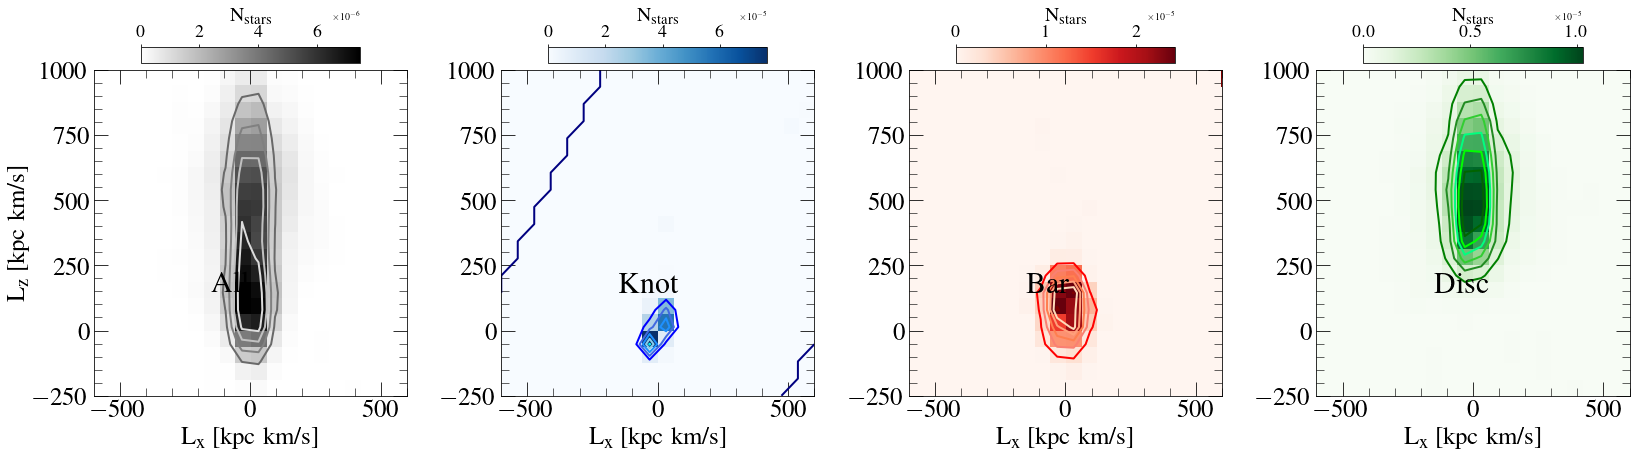

In [268]:
from matplotlib.colors import LogNorm
colores1 = ['k','dimgray','gray','silver','gainsboro','snow']
colores = ['navy','b','royalblue','dodgerblue','skyblue','cyan']
colores2 = ['maroon','r','salmon','coral','lightsalmon','peachpuff']
colores3 = ['darkgreen','g','forestgreen','limegreen','springgreen','lime']

fig, axes = plt.subplots(1, 4,figsize=(28,6),facecolor='white')


axes[0].text(-150,150,'All',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[0].imshow(np.rot90(zi_all.reshape(xi_all.shape)),cmap='binary',extent=[-600,600,-250,1000])
axes[0].contour(xi_all, yi_all, zi_all.reshape(xi_all.shape),levels=6,colors=colores1,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0].set_xlabel('L$_{\mathrm{x}}$ [kpc km/s]',fontsize=25)
axes[0].set_ylabel('L$_{\mathrm{z}}$ [kpc km/s]',fontsize=25)
axes[0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[0].inset_axes([0.15, 1.02, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
cbar.ax.tick_params(labelsize=18)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[0].subplot(1,3,1)
# axes[0].title('Knot',fontsize=20)
axes[1].text(-150,150,'Knot',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[1].imshow(np.rot90(zi_knot.reshape(xi_knot.shape)),cmap='Blues',extent=[-600,600,-250,1000])
axes[1].contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1].set_xlabel('L$_{\mathrm{x}}$ [kpc km/s]',fontsize=25)
# axes[1].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[1].inset_axes([0.15, 1.02, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
cbar.ax.tick_params(labelsize=18)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[1].subplot(1,3,2)
# axes[1].set_title('Bar',fontsize=20)
axes[2].text(-150,150,'Bar',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
color2 = axes[2].imshow(np.rot90(zi_bar.reshape(xi_bar.shape)),cmap='Reds',extent=[-600,600,-250,1000])
axes[2].contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[2].set_xlabel('L$_{\mathrm{x}}$ [kpc km/s]',fontsize=25)
# axes[2].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[2].minorticks_on()

# axes[1].colorbar(color2, aspect=40)
cax = axes[2].inset_axes([0.15, 1.02, 0.7, 0.05])
cbar = fig.colorbar(color2,ax=axes[2],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
cbar.ax.tick_params(labelsize=18)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[2].subplot(1,3,3)
# axes[2].set_title('Disc',fontsize=25)
axes[3].text(-150,150,'Disc',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
color3 = axes[3].imshow(np.rot90(zi_disc.reshape(xi_disc.shape)),cmap='Greens',extent=[-600,600,-250,1000])
axes[3].contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
# plt.xlim(-0.6,0.6)
# plt.ylim(-0.25,0.5)
axes[3].set_xlabel('L$_{\mathrm{x}}$ [kpc km/s]',fontsize=25)
# axes[3].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[3].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[3].minorticks_on()

cax = axes[3].inset_axes([0.15, 1.02, 0.7, 0.05])
cbar = fig.colorbar(color3,ax=axes[3],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
cbar.ax.tick_params(labelsize=18)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')


In [99]:
x_knot = x[mask_knot]
y_knot = y[mask_knot]
data_knot = np.array([x_knot,y_knot])

x_bar = x[mask_bar]
y_bar = y[mask_bar]
data_bar = np.array([x_bar,y_bar])

x_disc = x[mask_disc]
y_disc = y[mask_disc]
data_disc = np.array([x_disc,y_disc])


In [101]:
from scipy.stats import kde
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k_knot = kde.gaussian_kde(data_knot)
nbins=20
xi_knot, yi_knot = np.mgrid[-5:5:nbins*1j, -5:5:nbins*1j]
zi_knot = k_knot(np.vstack([xi_knot.flatten(), yi_knot.flatten()]))

k_bar = kde.gaussian_kde(data_bar)
nbins=20
xi_bar, yi_bar = np.mgrid[-5:5:nbins*1j, -5:5:nbins*1j]
zi_bar = k_bar(np.vstack([xi_bar.flatten(), yi_bar.flatten()]))

k_disc = kde.gaussian_kde(data_disc)
nbins=20
xi_disc, yi_disc = np.mgrid[-5:5:nbins*1j, -5:5:nbins*1j]
zi_disc = k_disc(np.vstack([xi_disc.flatten(), yi_disc.flatten()]))


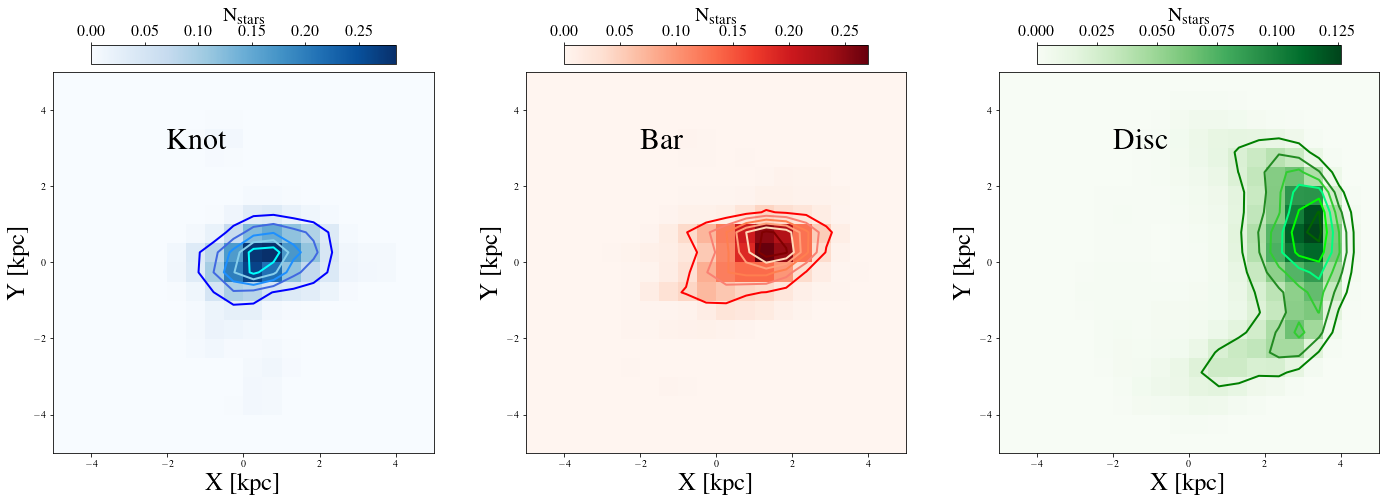

In [104]:
from matplotlib.colors import LogNorm
colores = ['navy','b','royalblue','dodgerblue','skyblue','cyan']
colores2 = ['maroon','r','salmon','coral','lightsalmon','peachpuff']
colores3 = ['darkgreen','g','forestgreen','limegreen','springgreen','lime']

fig, axes = plt.subplots(1, 3,figsize=(24,7),facecolor='white')

# axes[0].subplot(1,3,1)
# axes[0].title('Knot',fontsize=20)
axes[0].text(-2,3,'Knot',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[0].imshow(np.rot90(zi_knot.reshape(xi_knot.shape)),cmap='Blues',extent=[-5,5,-5,5])
axes[0].contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0].set_xlabel('X [kpc]',fontsize=25)
axes[0].set_ylabel('Y [kpc]',fontsize=25)
# axes[0].colorbar(color, aspect=40)
cax = axes[0].inset_axes([0.1, 1.02, 0.8, 0.05])
cbar = fig.colorbar(color,ax=axes[2],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[1].subplot(1,3,2)
# axes[1].set_title('Bar',fontsize=20)
axes[1].text(-2,3,'Bar',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
color2 = axes[1].imshow(np.rot90(zi_bar.reshape(xi_bar.shape)),cmap='Reds',extent=[-5,5,-5,5])
axes[1].contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1].set_xlabel('X [kpc]',fontsize=25)
axes[1].set_ylabel('Y [kpc]',fontsize=25)
# axes[1].colorbar(color2, aspect=40)
cax = axes[1].inset_axes([0.1, 1.02, 0.8, 0.05])
cbar = fig.colorbar(color2,ax=axes[2],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[2].subplot(1,3,3)
# axes[2].set_title('Disc',fontsize=25)
axes[2].text(-2,3,'Disc',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
color3 = axes[2].imshow(np.rot90(zi_disc.reshape(xi_disc.shape)),cmap='Greens',extent=[-5,5,-5,5])
axes[2].contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
# plt.xlim(-0.6,0.6)
# plt.ylim(-0.25,0.5)
axes[2].set_xlabel('X [kpc]',fontsize=25)
axes[2].set_ylabel('Y [kpc]',fontsize=25)

cax = axes[2].inset_axes([0.1, 1.02, 0.8, 0.05])
cbar = fig.colorbar(color3,ax=axes[2],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')


In [269]:
x_knot = x[mask_knot]
z_knot = z[mask_knot]
data_knot2 = np.array([x_knot,z_knot])

x_bar = x[mask_bar]
z_bar = z[mask_bar]
data_bar2 = np.array([x_bar,z_bar])

x_disc = x[mask_disc]
z_disc = z[mask_disc]
data_disc2 = np.array([x_disc,z_disc])


In [270]:
from scipy.stats import kde
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k_knot = kde.gaussian_kde(data_knot2)
nbins=20
xi_knot, yi_knot = np.mgrid[-5:5:nbins*1j, -5:5:nbins*1j]
zi_knot = k_knot(np.vstack([xi_knot.flatten(), yi_knot.flatten()]))

k_bar = kde.gaussian_kde(data_bar2)
nbins=20
xi_bar, yi_bar = np.mgrid[-5:5:nbins*1j, -5:5:nbins*1j]
zi_bar = k_bar(np.vstack([xi_bar.flatten(), yi_bar.flatten()]))

k_disc = kde.gaussian_kde(data_disc2)
nbins=20
xi_disc, yi_disc = np.mgrid[-5:5:nbins*1j, -5:5:nbins*1j]
zi_disc = k_disc(np.vstack([xi_disc.flatten(), yi_disc.flatten()]))


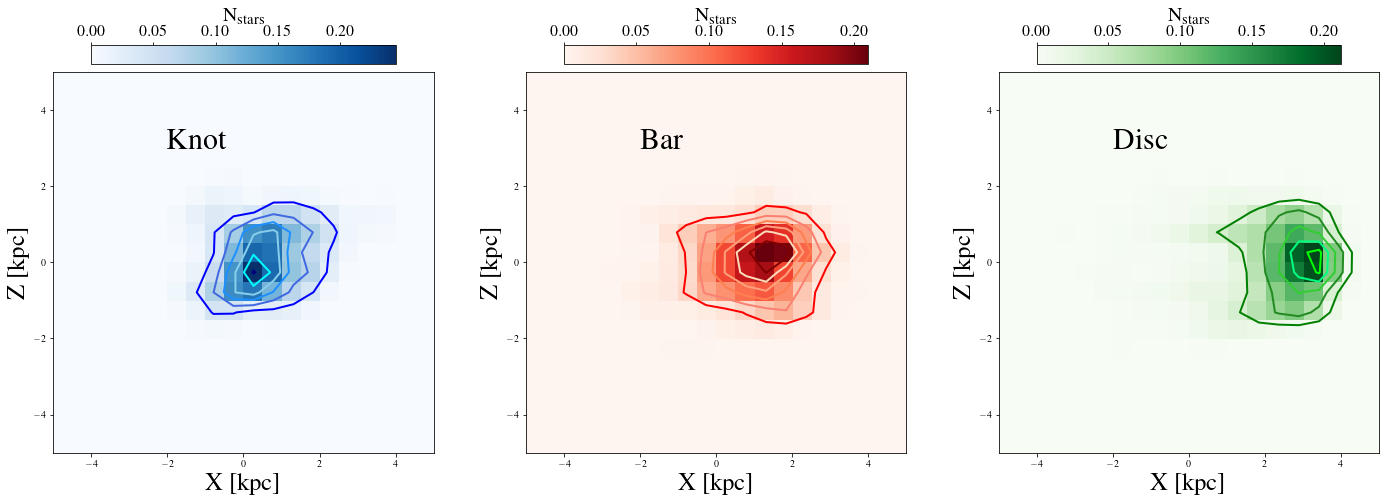

In [271]:
from matplotlib.colors import LogNorm
colores = ['navy','b','royalblue','dodgerblue','skyblue','cyan']
colores2 = ['maroon','r','salmon','coral','lightsalmon','peachpuff']
colores3 = ['darkgreen','g','forestgreen','limegreen','springgreen','lime']

fig, axes = plt.subplots(1, 3,figsize=(24,7),facecolor='white')

# axes[0].subplot(1,3,1)
# axes[0].title('Knot',fontsize=20)
axes[0].text(-2,3,'Knot',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[0].imshow(np.rot90(zi_knot.reshape(xi_knot.shape)),cmap='Blues',extent=[-5,5,-5,5])
axes[0].contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0].set_xlabel('X [kpc]',fontsize=25)
axes[0].set_ylabel('Z [kpc]',fontsize=25)
# axes[0].colorbar(color, aspect=40)
cax = axes[0].inset_axes([0.1, 1.02, 0.8, 0.05])
cbar = fig.colorbar(color,ax=axes[2],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[1].subplot(1,3,2)
# axes[1].set_title('Bar',fontsize=20)
axes[1].text(-2,3,'Bar',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
color2 = axes[1].imshow(np.rot90(zi_bar.reshape(xi_bar.shape)),cmap='Reds',extent=[-5,5,-5,5])
axes[1].contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1].set_xlabel('X [kpc]',fontsize=25)
axes[1].set_ylabel('Z [kpc]',fontsize=25)
# axes[1].colorbar(color2, aspect=40)
cax = axes[1].inset_axes([0.1, 1.02, 0.8, 0.05])
cbar = fig.colorbar(color2,ax=axes[2],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[2].subplot(1,3,3)
# axes[2].set_title('Disc',fontsize=25)
axes[2].text(-2,3,'Disc',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
color3 = axes[2].imshow(np.rot90(zi_disc.reshape(xi_disc.shape)),cmap='Greens',extent=[-5,5,-5,5])
axes[2].contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
# plt.xlim(-0.6,0.6)
# plt.ylim(-0.25,0.5)
axes[2].set_xlabel('X [kpc]',fontsize=25)
axes[2].set_ylabel('Z [kpc]',fontsize=25)

cax = axes[2].inset_axes([0.1, 1.02, 0.8, 0.05])
cbar = fig.colorbar(color3,ax=axes[2],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
cbar.ax.tick_params(labelsize=16)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')


In [237]:
a = np.linspace(10,100,10)
print(a)

[ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


In [238]:
percen_lx = np.percentile(lx_bar[lx_bar>0],[np.linspace(10,100,10)])[0]
percen_ly = np.percentile(ly_bar[ly_bar>0],[np.linspace(10,100,10)])[0]
print(percen_lx)
print(percen_ly)

[  2.23787752   6.17947097  12.15760742  19.11315229  25.65155688
  35.37595024  45.68104172  59.86398575  78.90955455 140.11548354]
[ 10.01493895  22.37826837  37.80874705  50.27768051  62.55814475
  78.05493406  94.6472493  118.75908402 151.98219573 261.90523384]


In [249]:
percen_lx2 = np.percentile(lx_bar[lx_bar<0],[np.linspace(10,100,10)])[0]
percen_ly2 = np.percentile(ly_bar[ly_bar<0],[np.linspace(10,100,10)])[0]
print(percen_lx2)
print(percen_ly2)

[-7.46573702e+01 -5.64349184e+01 -4.37165875e+01 -3.17834177e+01
 -2.27340904e+01 -1.62941406e+01 -1.03295328e+01 -5.42721065e+00
 -2.46861786e+00 -2.39098808e-02]
[-156.61117444 -124.43239287  -96.8095528   -81.28003463  -66.79871275
  -49.88437791  -32.34944843  -17.45797715   -8.33187685   -0.36227966]


In [239]:
phi_bar_all = np.zeros((len(percen_lx)))

for indx, i in enumerate(percen_lx):
    phi_bar_all[indx]= np.arctan(np.abs(i)/np.abs(percen_ly[indx])) 

In [250]:
phi_bar_all2 = np.zeros((len(percen_lx2)))

for indx, i in enumerate(percen_lx2):
    phi_bar_all2[indx]= np.arctan(np.abs(i)/np.abs(percen_ly2[indx])) 

In [251]:
import math
phi_bar_all_d = [math.degrees(i) for i in phi_bar_all]
phi_bar_all_d2 = [math.degrees(i) for i in phi_bar_all2]

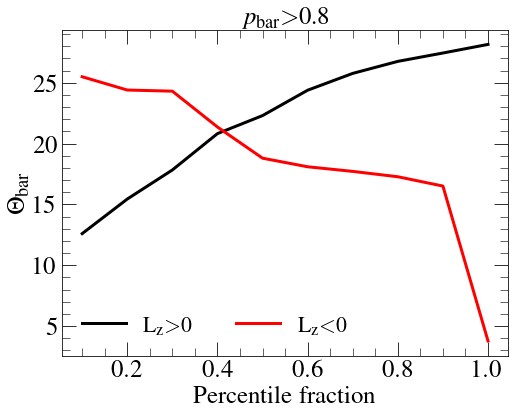

In [253]:
plt.figure(figsize=(8,6),facecolor='white')

plt.title(r'$p_{\mathrm{bar}}$$>$0.8', fontsize=25)
plt.plot(np.linspace(0.1,1,len(phi_bar_all_d)),phi_bar_all_d,lw=3,c='k',label='L$_{\mathrm{z}}$$>$0')
plt.plot(np.linspace(0.1,1,len(phi_bar_all_d2)),phi_bar_all_d2,lw=3,c='r',label='L$_{\mathrm{z}}$$<$0')
plt.xlabel('Percentile fraction',fontsize=25)
plt.ylabel('$\Theta_{\mathrm{bar}}$',fontsize=25)
plt.legend(loc='lower left',fontsize=22,frameon=False,ncol=2)
plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
plt.tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()